In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


# Sentiment Analysis using NLTK


Text analysis using NLTK is a process of extracting meaning from text using the Natural Language Toolkit (NLTK) library in Python. NLTK provides a wide range of natural language processing (NLP) tools and resources, including:
- Tokenization: The process of breaking down a text into smaller units, such as words or sentences.
- Part-of-speech tagging: The process of assigning a part of speech to each word in a text, such as noun, verb, adjective, etc.
- Stemming: The process of reducing a word to its root form, such as "running" to "run".
- Lemmatization: The process of reducing a word to its base form, such as "running" to "run" and "went" to "go".
- Sentiment analysis: The process of determining the sentiment of a text, such as whether it is positive, negative, or neutral.
- Topic segmentation: The process of identifying the topics in a text.
- Named entity recognition: The process of identifying named entities in a text, such as people, places, organizations, etc.

### Use of following techniques
- VADER (Valence Aware Dictionary and Entiment Reasoner) - Bag of words
- Roberta Pretrained Model 
- HuggingFace Pipeline


### Read the dataset

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


plt.style.use('ggplot')



In [132]:
# read

df  = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [133]:
#shape of dataset


df.shape

(568454, 10)

In [134]:
# columns names 

df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [135]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

## Exploratory data analysis

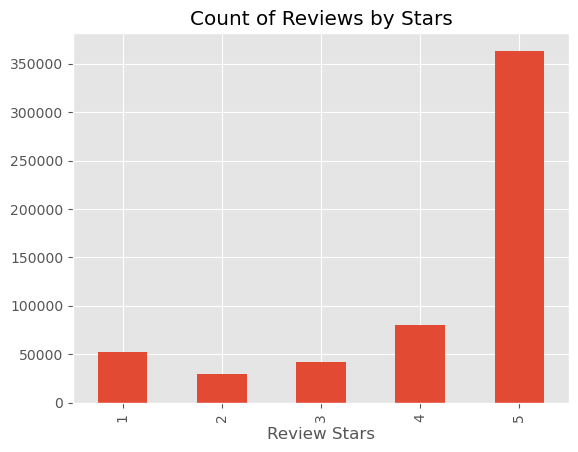

<Figure size 1000x600 with 0 Axes>

In [136]:
axis = df['Score'].value_counts().sort_index().\
plot(kind = 'bar', title = 'Count of Reviews by Stars')
axis.set_xlabel('Review Stars')
plt.figure(figsize=(10,6))
plt.show()

## NLTK Operations

In [137]:
df = df[:1000]
df.shape

(1000, 10)

In [138]:
example = df['Text'][808]
print(example)

I bought these chocolate liquor cups for a party! It was a big hit. They are high quality and a good buy.


In [139]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'bought',
 'these',
 'chocolate',
 'liquor',
 'cups',
 'for',
 'a',
 'party',
 '!']

In [140]:
tagged = nltk.pos_tag(tokens)
print(tagged[:10])

[('I', 'PRP'), ('bought', 'VBD'), ('these', 'DT'), ('chocolate', 'NN'), ('liquor', 'NN'), ('cups', 'NNS'), ('for', 'IN'), ('a', 'DT'), ('party', 'NN'), ('!', '.')]


In [141]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

#takes a list of POS-tagged tokens and prints a tree of named entities in a human-readable format.

(S
  I/PRP
  bought/VBD
  these/DT
  chocolate/NN
  liquor/NN
  cups/NNS
  for/IN
  a/DT
  party/NN
  !/.
  It/PRP
  was/VBD
  a/DT
  big/JJ
  hit/NN
  ./.
  They/PRP
  are/VBP
  high/JJ
  quality/NN
  and/CC
  a/DT
  good/JJ
  buy/NN
  ./.)


## VADER Sentiment Scoring

- Uses SentimentIntensityAnalyzer to get the negative/ neutral/ positive scores of text.

- Uses bag of words 
    1. Remove Stopwords
    2. Each word is scored and combined to total score

In [142]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [143]:
sia.polarity_scores("I am so good bro!!")

{'neg': 0.0, 'neu': 0.443, 'pos': 0.557, 'compound': 0.5827}

In [144]:
sia.polarity_scores('it was the worst day of my life ')

{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}

In [145]:
# Run the polarity score on the entire dataset and store it in data frame

res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] =  sia.polarity_scores(text)
    
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [146]:
new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns = {'index': 'Id'})
new_df = new_df.merge(df, how = 'left')

In [147]:
# showing new dataframe with sentiment score

new_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plotting VADER results

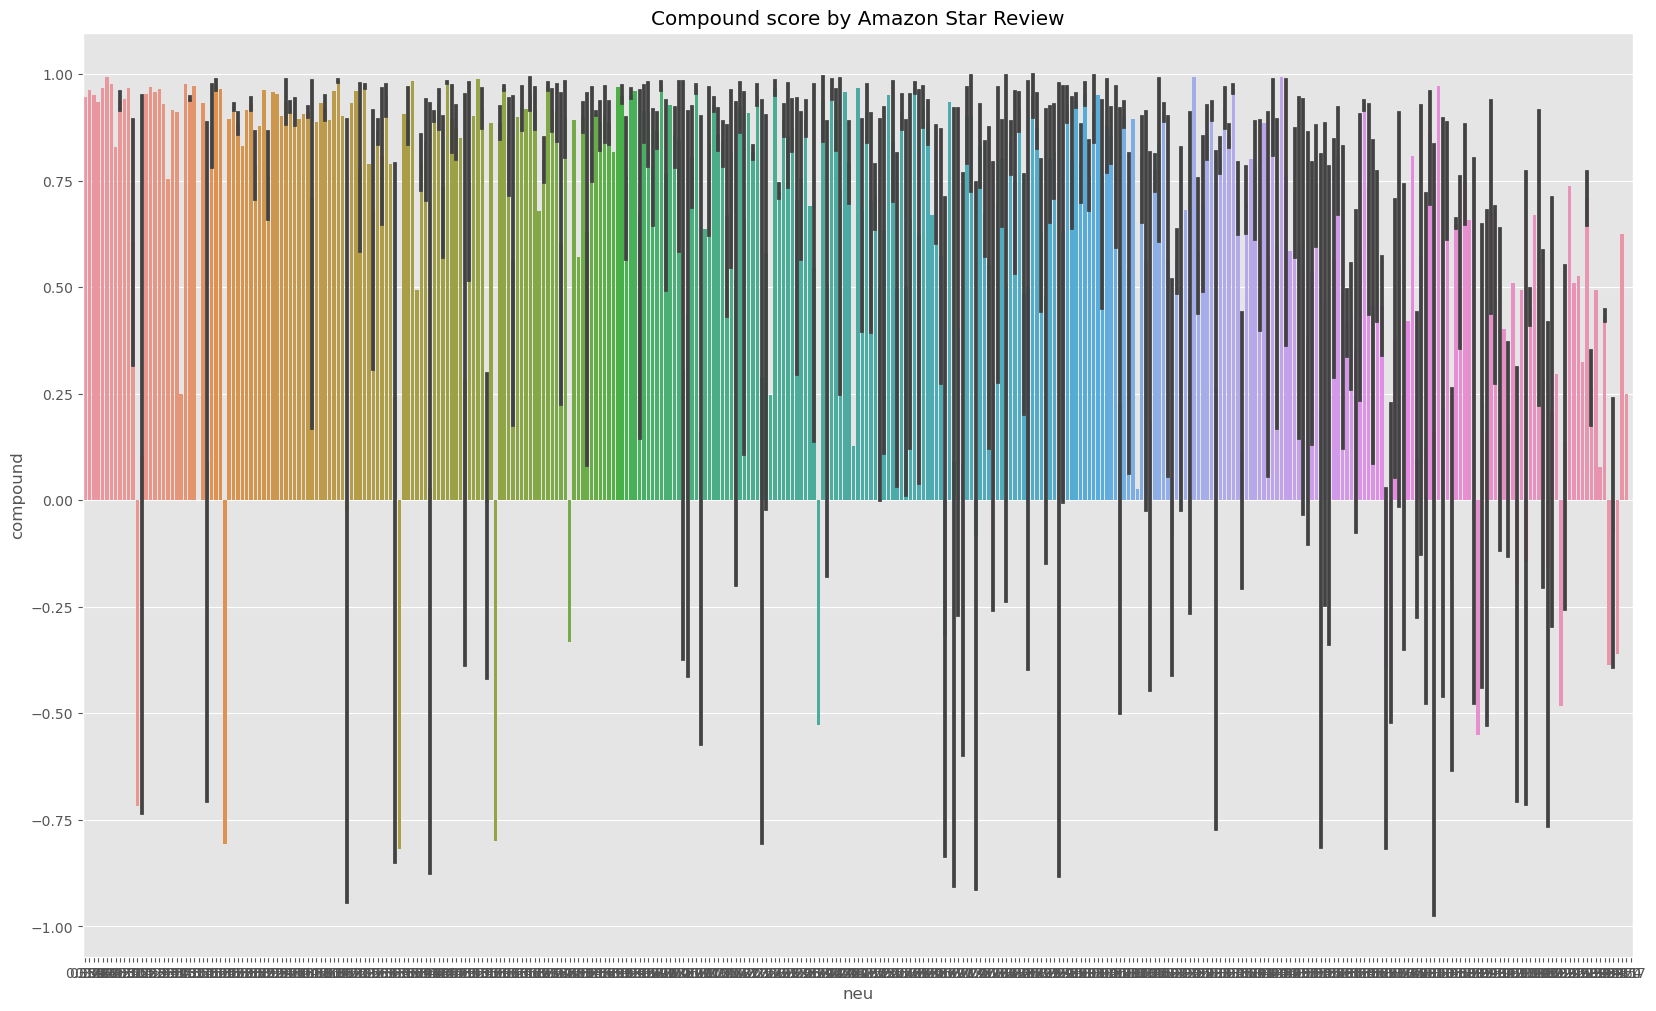

In [148]:
# plotting compound plot 

plt.figure(figsize = (20,12))
ax = sns.barplot(data = new_df, x = 'neu', y = 'compound')
ax.set_title('Compound score by Amazon Star Review')
plt.show()

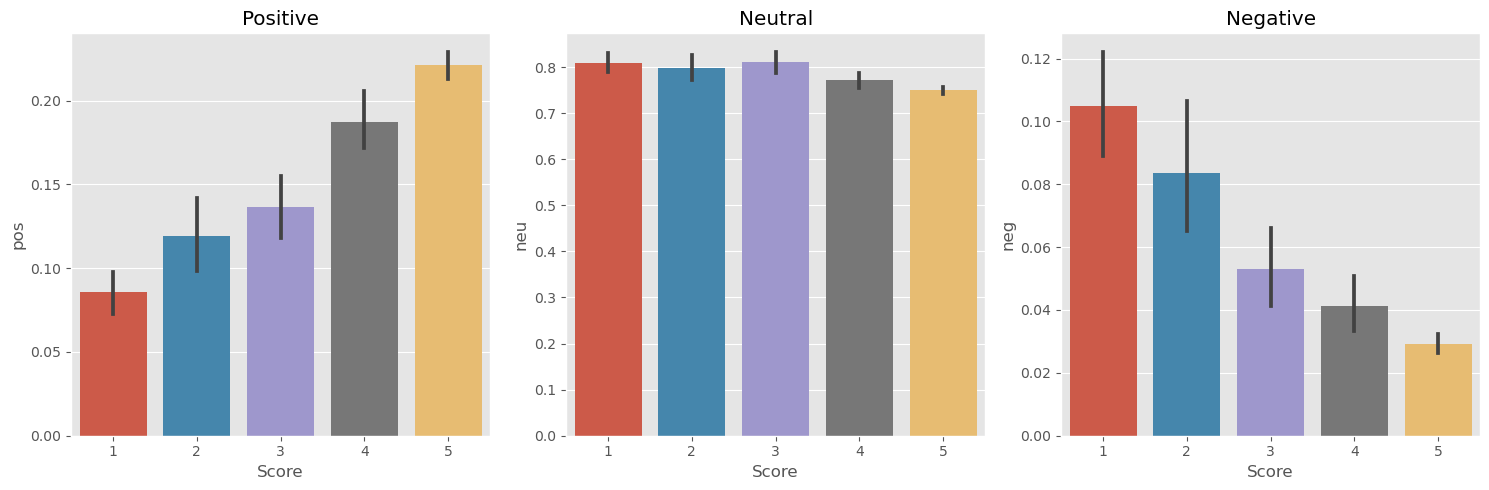

In [149]:

fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data = new_df, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = new_df, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = new_df, x = 'Score', y = 'neg', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
ax.set_title('Compound score by Amazon Star Review')
plt.show()

## Roberta Pretrained Model

- use model trained of large corpus of data
- Transformer model accounts for the words but also the context related to other words

In [150]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [151]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [152]:
# VADER Results on example 

print(example)
sia.polarity_scores(example)

I bought these chocolate liquor cups for a party! It was a big hit. They are high quality and a good buy.


{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7088}

In [153]:
# run for Roberta Model

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]

}
print(scores_dict)

{'roberta_neg': 0.0011278251, 'roberta_neu': 0.01566863, 'roberta_pos': 0.9832036}


In [154]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]

    }
    return scores_dict

In [155]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [156]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [157]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Step 3: Combine and compare

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


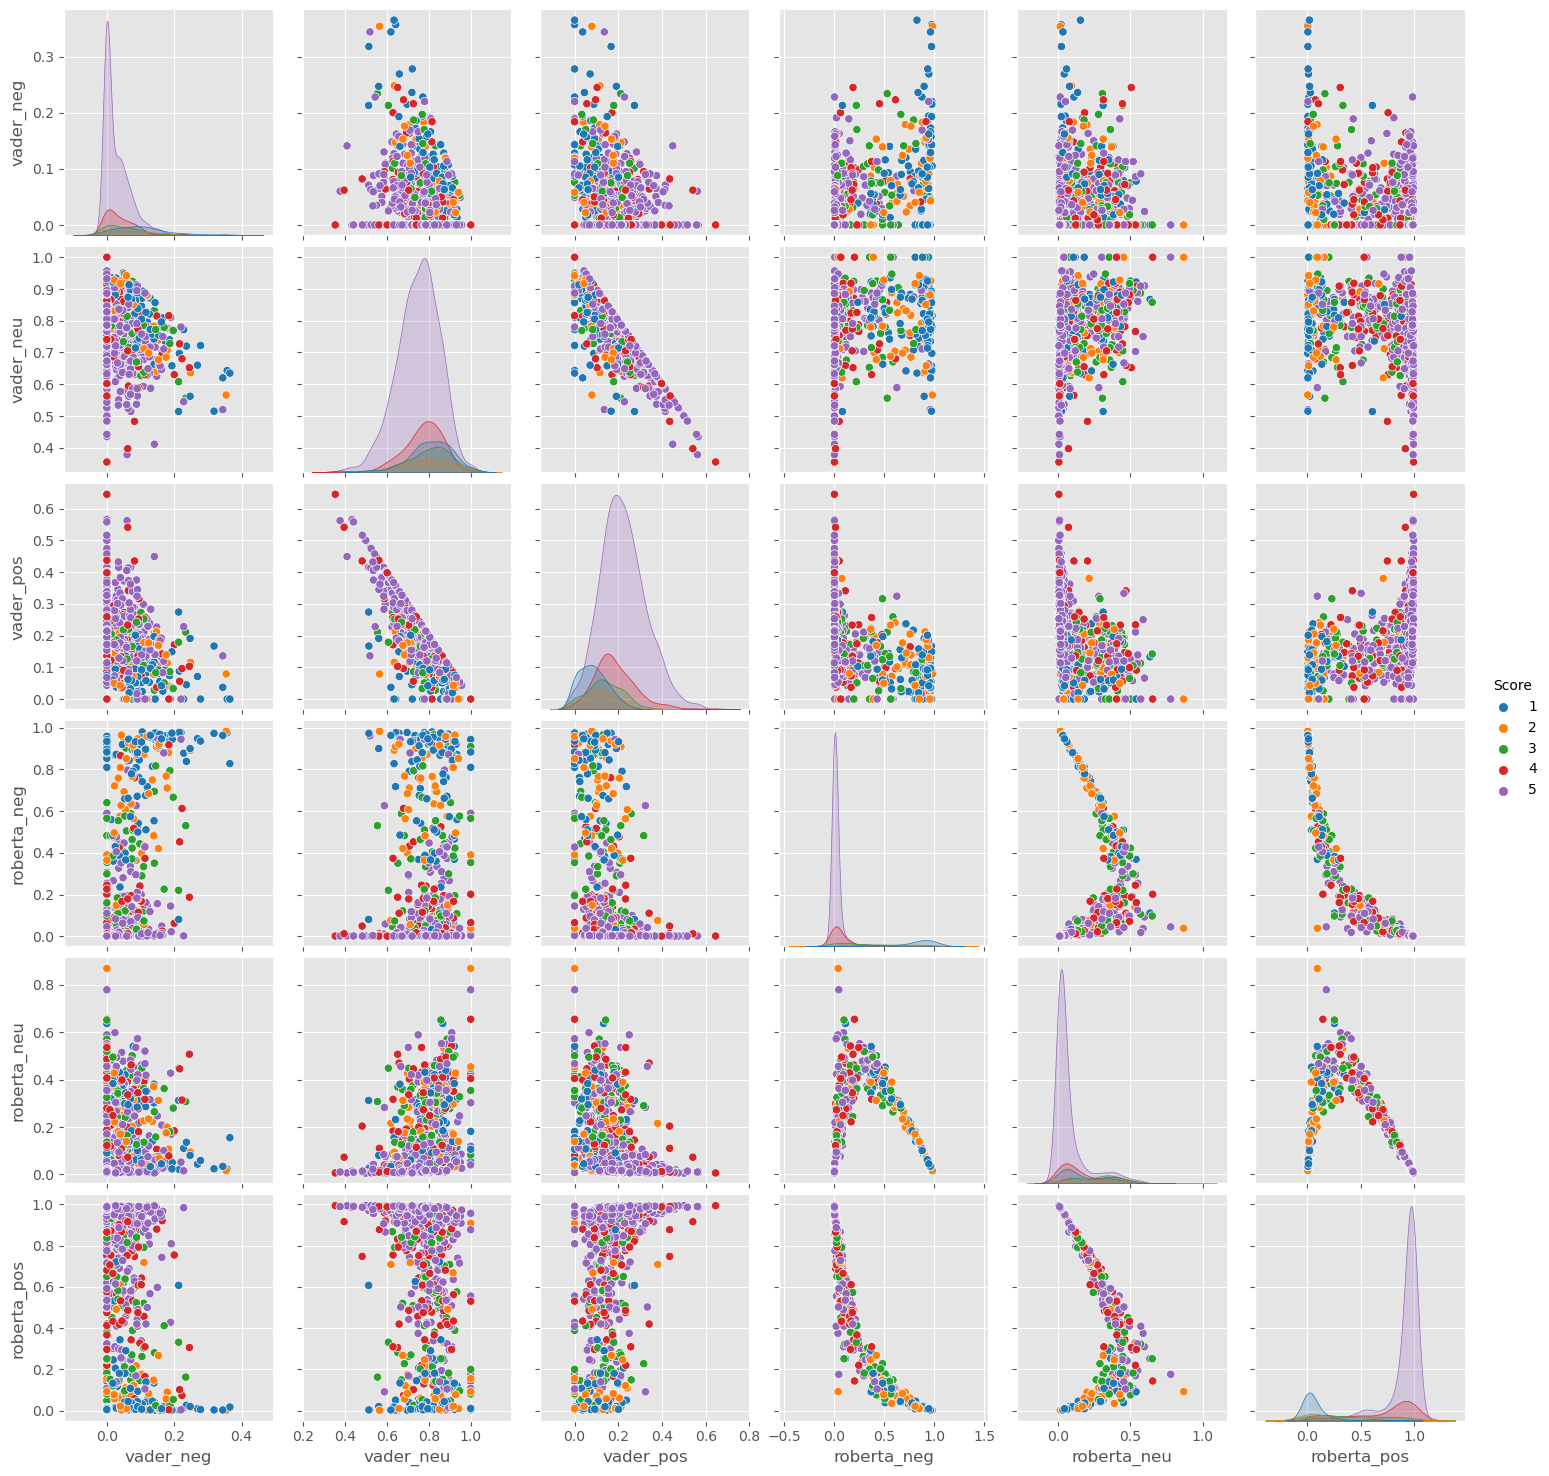

In [158]:
# compare scores between models using pairplots

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Review Examples:


In [159]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [160]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [161]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [162]:
results_df.query('Score == 5') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'This is an great product. The taste is great, and it works exactly as described. Superb natural sleep aid. AMAZING!'

## Transformers Pipeline

In [163]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [164]:
sent_pipeline("I like oppenheimer movie")

[{'label': 'POSITIVE', 'score': 0.9989686012268066}]

In [165]:
sent_pipeline("I don't care about barbie")

[{'label': 'NEGATIVE', 'score': 0.9996942281723022}]

In [167]:
import pickle
filename = "text_analyser.pkl"

pickle.dump(model, open(filename, 'wb'))